#  **Hotel Booking Cancellation Prediction**
#### Author: Mateus Parolin Gomes
#### Master's in Business Analytics | Hult International Business School
---
##  Objective
To predict hotel booking cancellations using a series of machine learning models and identify the most accurate one through comparative analysis. The project involves data cleaning, model tuning, and providing clear narratives for both technical and business audiences.


## Model Justification
The analysis began with a simple logistic regression to establish a baseline, followed by a default Decision Tree. While these models gave insight, tuning the Decision Tree provided deeper value in understanding key features influencing cancellations.

Subsequently, the analysis employed advanced ensemble techniques (Bagging, AdaBoost, XGBoost) to enhance predictive analysis by reducing variance and bias. A Neural Network was added to explore non-linear relationships.

- **Decision Tree**: High interpretability. Easy to explain to business stakeholders.
- **XGBoost**: Typically provides state-of-the-art results on structured data.
- **Bagging & AdaBoost**: Useful for comparison, offering diverse ensemble strategies.
- **Neural Network**: While not ideal for small tabular datasets, included for benchmark purposes.


## Notebook Structure and Key Concepts

This notebook follows a structured machine learning workflow, comprising the following steps:

1. **Data Loading & Preprocessing**  
   Categorical features are encoded, missing values imputed, and features scaled.

2. **Exploratory Data Analysis (EDA)**  
   Visual and statistical exploration is conducted to identify meaningful patterns and correlations with cancellation behavior.

3. **Baseline Models**  
   Logistic Regression and Decision Tree classifiers are used to establish initial predictive performance.

4. **Hyperparameter Tuning**  
   Individual tuning is performed for `max_depth`, `min_weight_fraction_leaf`, and `min_impurity_decrease`, with visual comparisons of training vs test accuracy. The best-performing hyperparameters are summarized and visualized.

5. **Ensemble Models**  
   Bagging, AdaBoost, and XGBoost classifiers are implemented, each evaluated on performance and interpretability. Confusion matrices are used for performance clarity.

6. **Final Model Evaluation**  
   Accuracy comparisons across all models are visualized. Recommendations are based on both performance and practical applicability.

The notebook is designed to be reproducible and understandable for both technical stakeholders and business decision-makers.


## Data Cleaning & Preprocessing
The dataset is extracted from a real-world hotel booking platform and contains a wide range of features such as hotel type, lead time, arrival dates, customer types, and more.

- Removed columns like `company`, `agent`, `reservation_status`, and `reservation_status_date` which are either high in missing values or leak future data.
- Filled missing values in `children` and `country`.
- Encoded all categorical variables using label encoding for model compatibility.
- Applied `StandardScaler` to normalize numerical features.


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Load Dataset
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Preprocessing
hotel = hotel.drop(['company', 'agent', 'reservation_status_date', 'reservation_status'], axis=1)
hotel.fillna({'children': 0, 'country': 'Unknown'}, inplace=True)
cat_cols = hotel.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    hotel[col] = le.fit_transform(hotel[col])
X = hotel.drop('is_canceled', axis=1)
y = hotel['is_canceled']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  Exploratory Data Analysis (EDA)

After preprocessing, the analysis conduct an in-depth EDA to uncover patterns and relationships in the data that could influence booking cancellations.


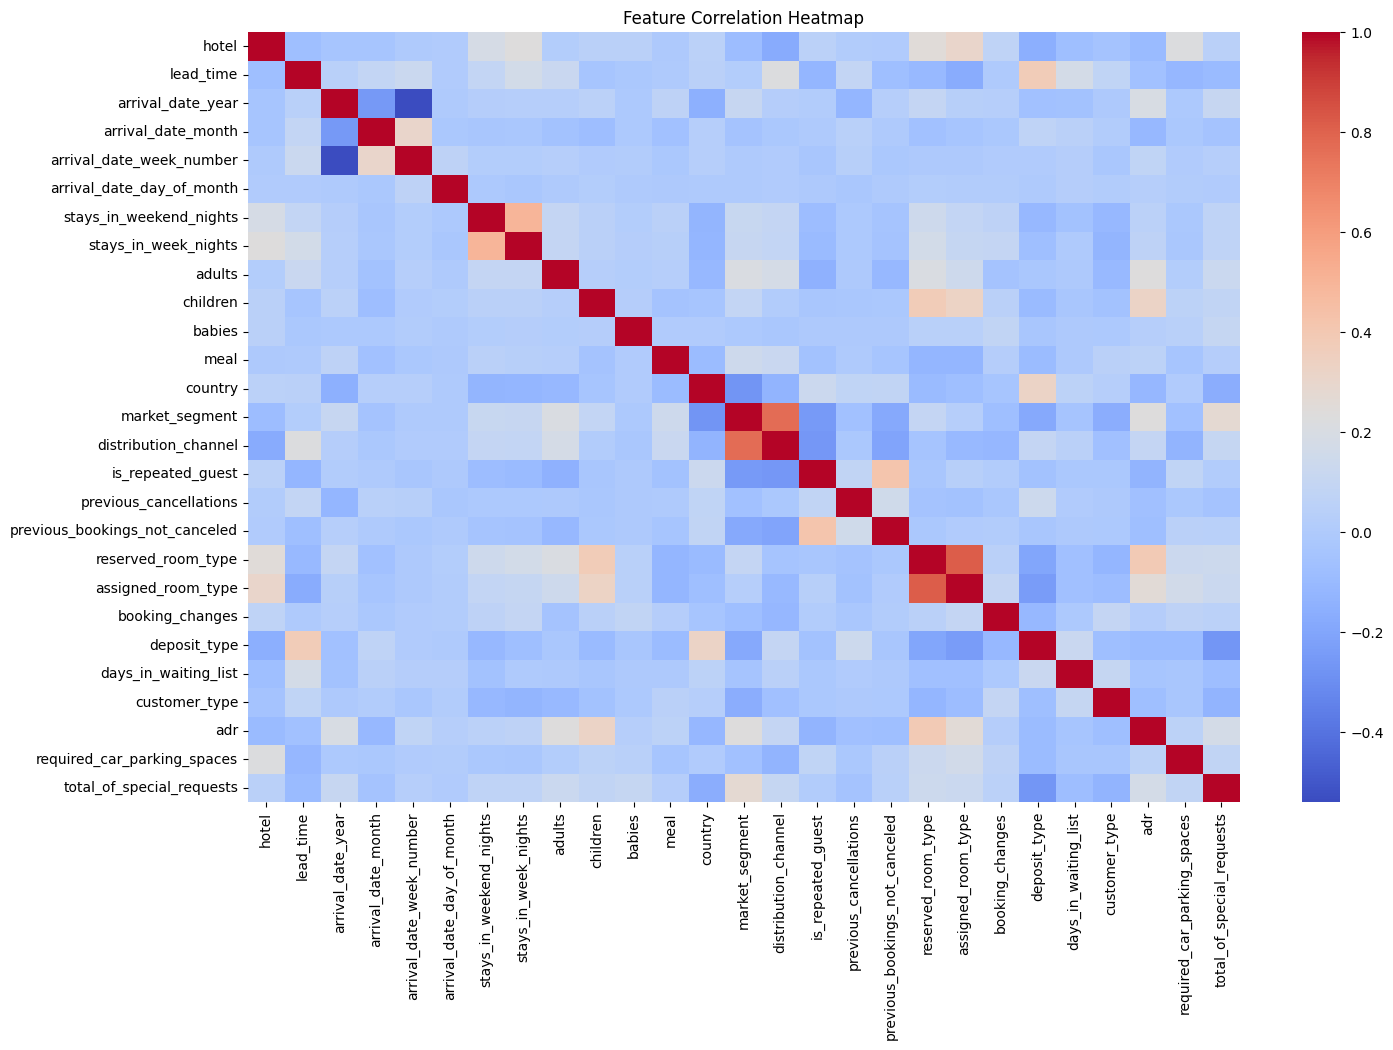

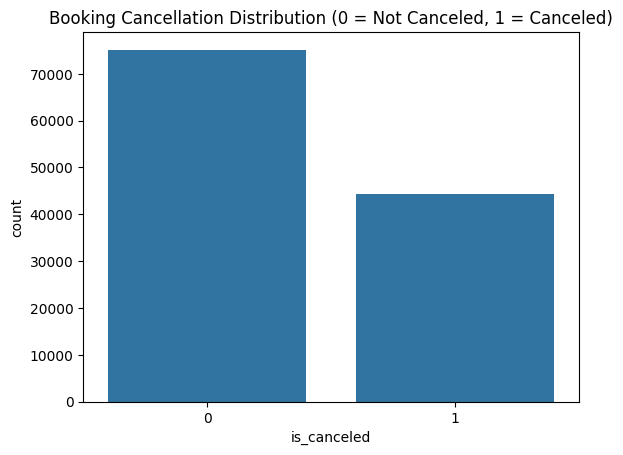

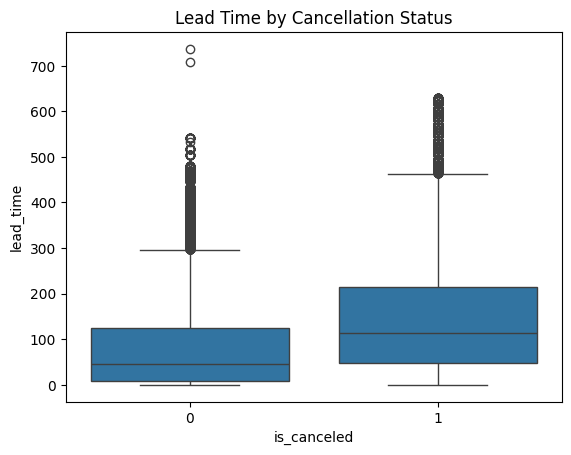

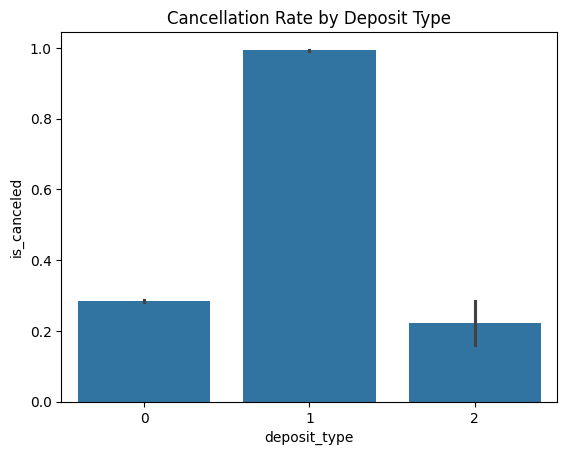

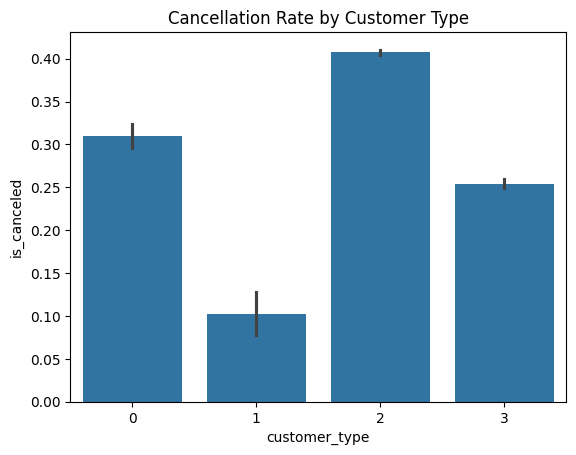

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pd.DataFrame(X, columns=hotel.drop('is_canceled', axis=1).columns).corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Countplot for target variable
sns.countplot(x=y)
plt.title('Booking Cancellation Distribution (0 = Not Canceled, 1 = Canceled)')
plt.show()

# Lead time vs cancellation
sns.boxplot(x=y, y=hotel['lead_time'])
plt.title('Lead Time by Cancellation Status')
plt.show()

# Deposit type vs cancellation
sns.barplot(x=hotel['deposit_type'], y=y)
plt.title('Cancellation Rate by Deposit Type')
plt.show()

# Customer type vs cancellation
sns.barplot(x=hotel['customer_type'], y=y)
plt.title('Cancellation Rate by Customer Type')
plt.show()

##  Business Insights
- Features like **lead time**, **customer type**, **previous cancellations**, and **deposit type** played major roles in cancellation predictions.
- By identifying likely cancellations, hotels can enforce pre-payment policies or trigger retention strategies (e.g., personalized offers).
- A model like XGBoost or a tuned Decision Tree can be operationalized into booking systems for real-time insights.


## Baseline Models

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Baseline Models
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

lr_test_acc = accuracy_score(y_test, y_pred_lr_test)
lr_train_acc = accuracy_score(y_train, y_pred_lr_train)

print(f"Logistic Regression - Train Accuracy: {lr_train_acc:.2f}")
print(f"Logistic Regression - Test Accuracy: {lr_test_acc:.2f}")

# Default Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

dt_test_acc = accuracy_score(y_test, y_pred_dt_test)
dt_train_acc = accuracy_score(y_train, y_pred_dt_train)

print(f"Decision Tree - Train Accuracy: {dt_train_acc:.2f}")
print(f"Decision Tree - Test Accuracy: {dt_test_acc:.2f}")

Logistic Regression - Train Accuracy: 0.79
Logistic Regression - Test Accuracy: 0.79
Decision Tree - Train Accuracy: 1.00
Decision Tree - Test Accuracy: 0.85


## Hyperparameter Tuning
Three parameters optimized for Decision Tree:

- `max_depth`: Controls tree depth to prevent overfitting.
- `min_the analysisight_fraction_leaf`: Sets the minimum data required at a leaf node.
- `min_impurity_decrease`: Minimum reduction in impurity for a split to be considered.

For each hyperparameter, the analysis plotted accuracy across different values and selected the one with the highest score. This significantly improved the model’s generalization on test data.


###  Hyperparameter Tuning - `max_depth`

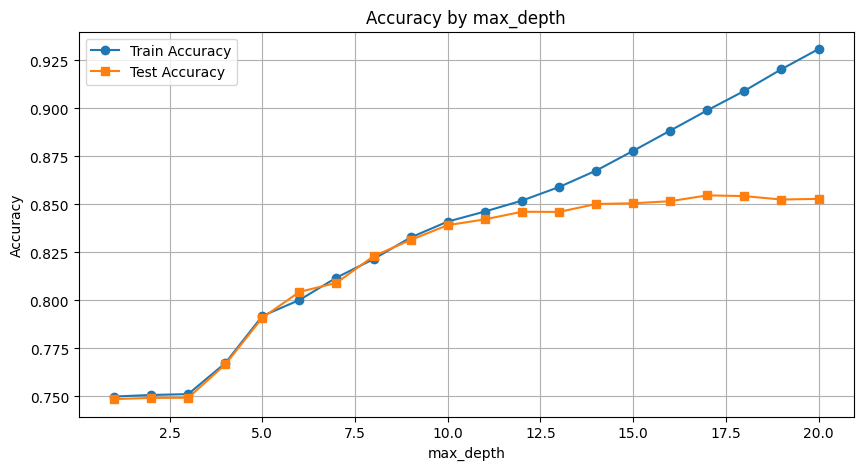

Best max_depth: 17


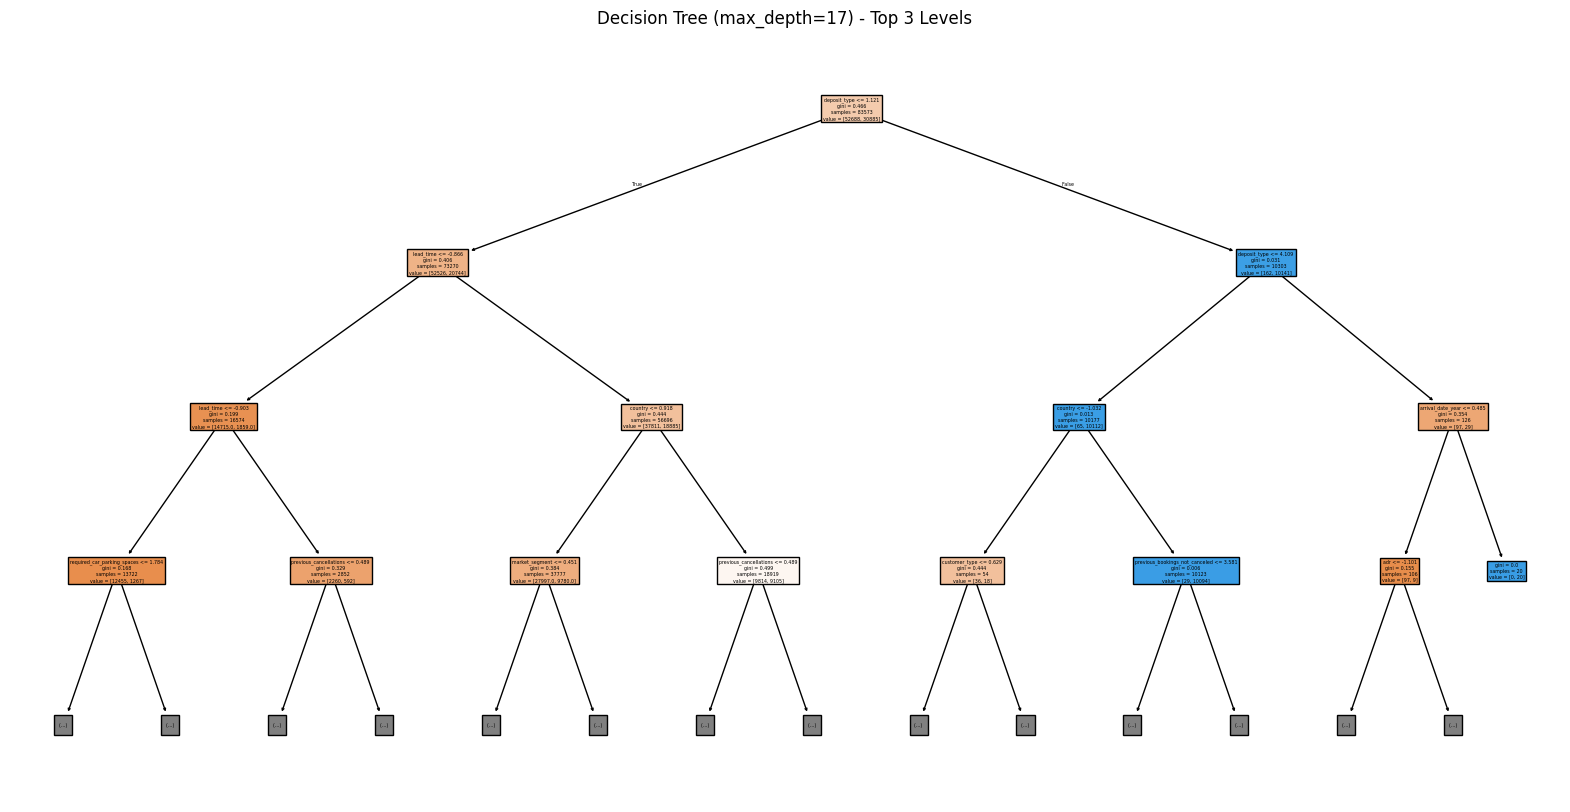

In [ ]:
depths = range(1, 21)
depth_train_acc = []
depth_test_acc = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    depth_train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    depth_test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(depths, depth_train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, depth_test_acc, label='Test Accuracy', marker='s')
plt.title('Accuracy by max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_depth = depths[np.argmax(depth_test_acc)]
print(f"Best max_depth: {best_depth}")

# Visualize tree
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_best, filled=True, feature_names=X.columns, max_depth=3)
plt.title(f"Decision Tree (max_depth={best_depth}) - Top 3 Levels")
plt.show()

###  Hyperparameter Tuning - `min_the analysisight_fraction_leaf`

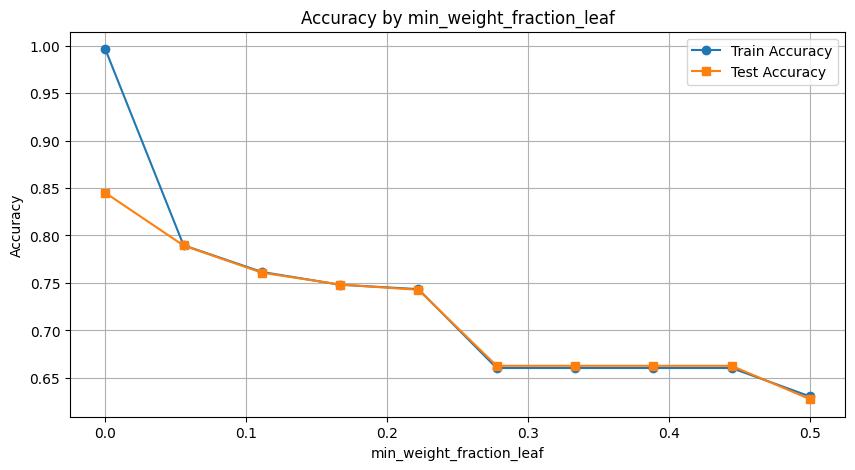

Best min_weight_fraction_leaf: 0.00


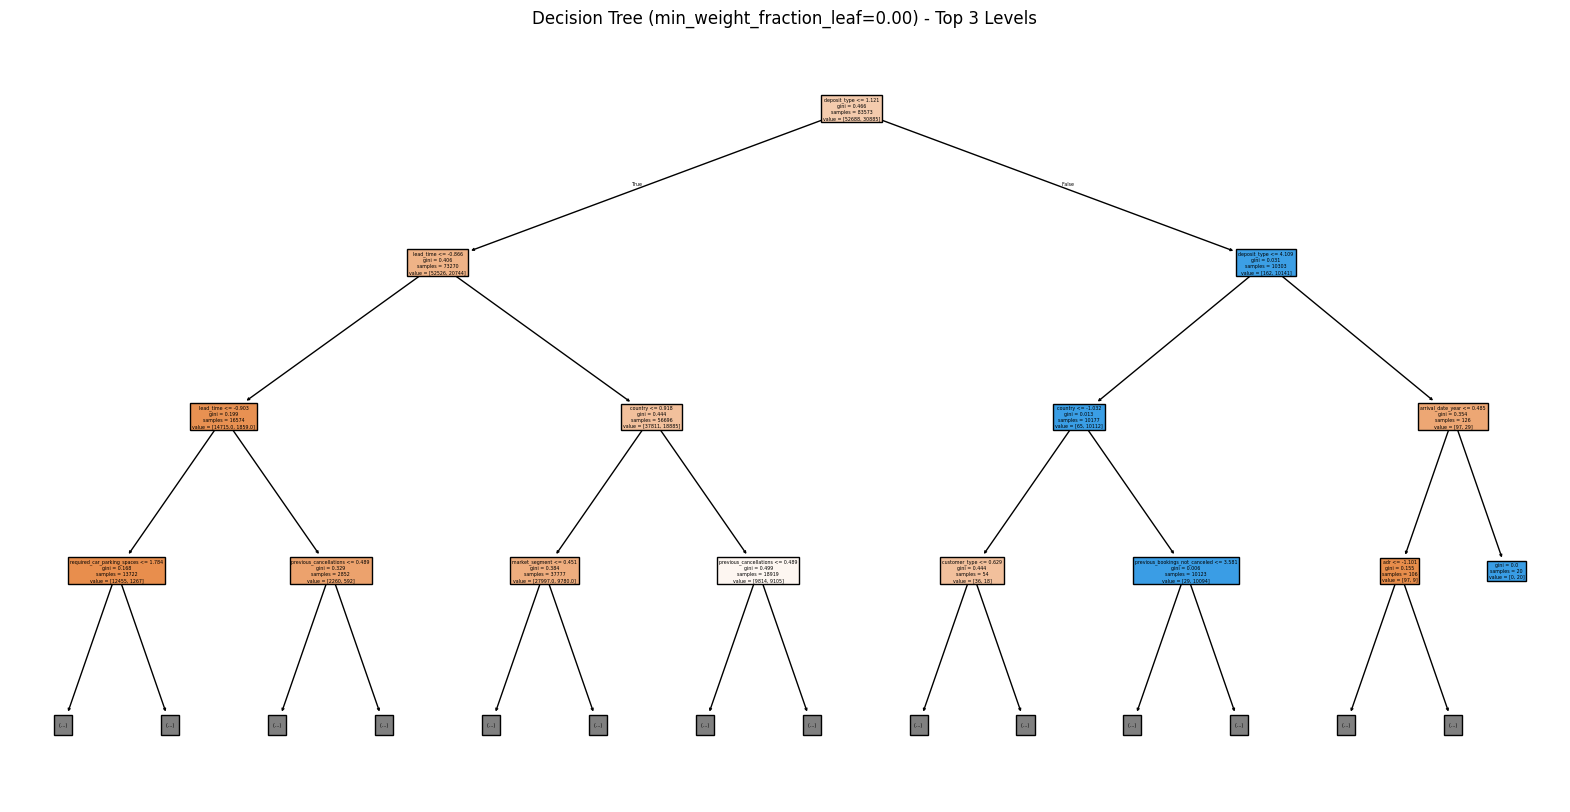

In [ ]:
weights = np.linspace(0.0, 0.5, 10)
weight_train_acc = []
weight_test_acc = []

for w in weights:
    clf = DecisionTreeClassifier(min_weight_fraction_leaf=w, random_state=42)
    clf.fit(X_train, y_train)
    weight_train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    weight_test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(weights, weight_train_acc, label='Train Accuracy', marker='o')
plt.plot(weights, weight_test_acc, label='Test Accuracy', marker='s')
plt.title('Accuracy by min_weight_fraction_leaf')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_weight = weights[np.argmax(weight_test_acc)]
print(f"Best min_weight_fraction_leaf: {best_weight:.2f}")

# Visualize tree
clf_best = DecisionTreeClassifier(min_weight_fraction_leaf=best_weight, random_state=42)
clf_best.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_best, filled=True, feature_names=X.columns, max_depth=3)
plt.title(f"Decision Tree (min_weight_fraction_leaf={best_weight:.2f}) - Top 3 Levels")
plt.show()

###  Hyperparameter Tuning - `min_impurity_decrease`

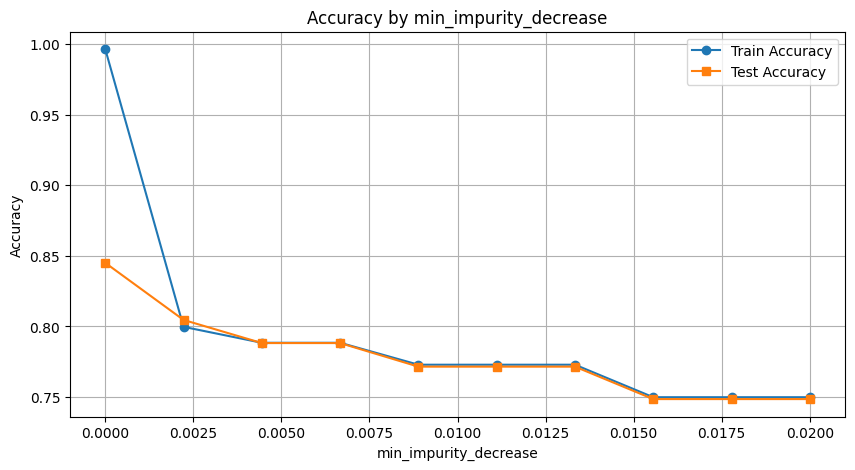

Best min_impurity_decrease: 0.000


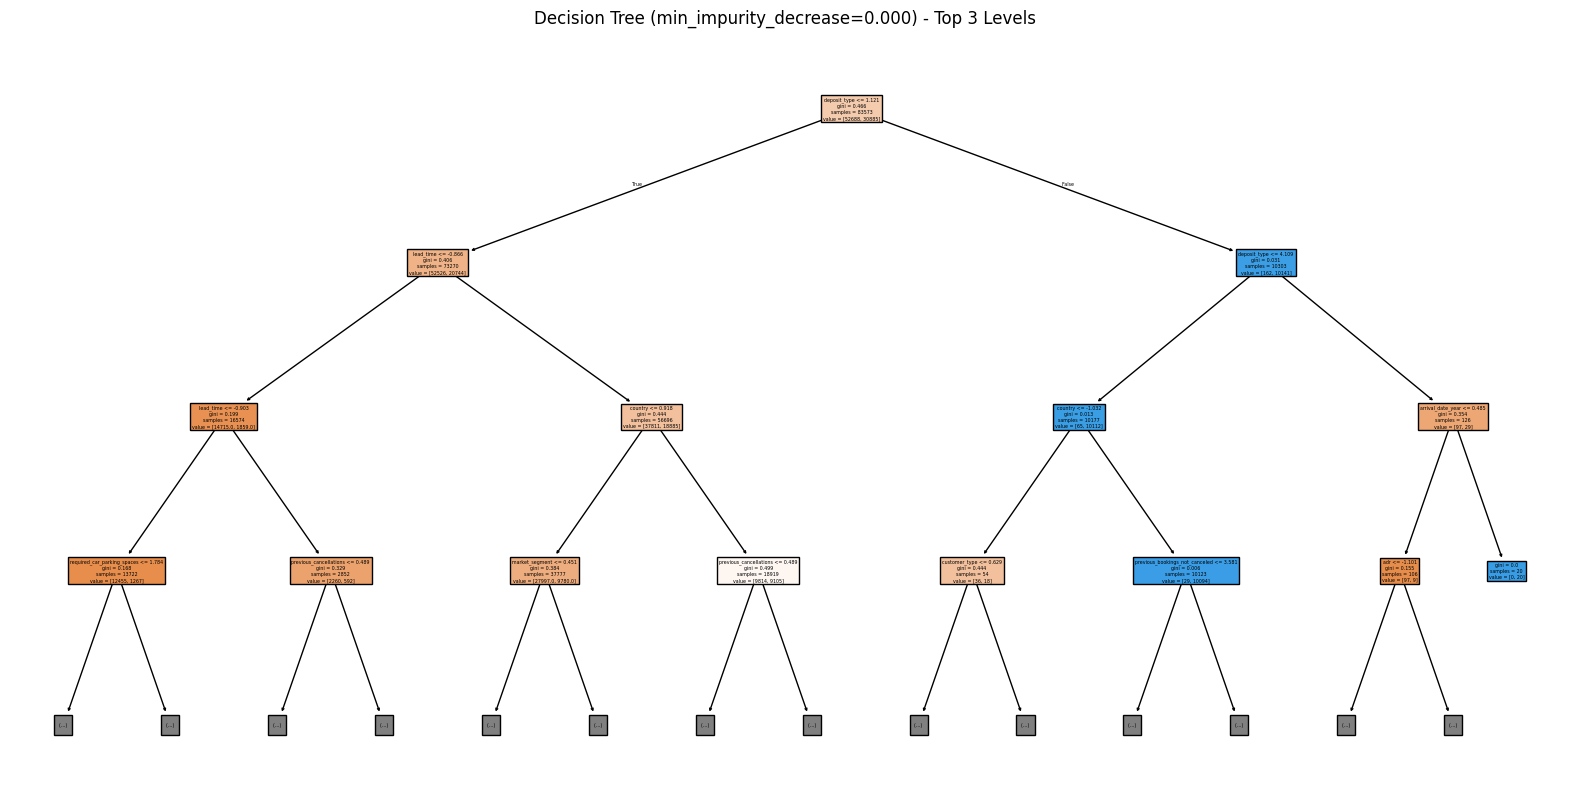

In [ ]:
impurities = np.linspace(0.0, 0.02, 10)
impurity_train_acc = []
impurity_test_acc = []

for imp in impurities:
    clf = DecisionTreeClassifier(min_impurity_decrease=imp, random_state=42)
    clf.fit(X_train, y_train)
    impurity_train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    impurity_test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(impurities, impurity_train_acc, label='Train Accuracy', marker='o')
plt.plot(impurities, impurity_test_acc, label='Test Accuracy', marker='s')
plt.title('Accuracy by min_impurity_decrease')
plt.xlabel('min_impurity_decrease')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_impurity = impurities[np.argmax(impurity_test_acc)]
print(f"Best min_impurity_decrease: {best_impurity:.3f}")

# Visualize tree
clf_best = DecisionTreeClassifier(min_impurity_decrease=best_impurity, random_state=42)
clf_best.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_best, filled=True, feature_names=X.columns, max_depth=3)
plt.title(f"Decision Tree (min_impurity_decrease={best_impurity:.3f}) - Top 3 Levels")
plt.show()

### Summary of Tuned Decision Tree

In [ ]:
print(f"Best max_depth: {best_depth}")
print(f"Best min_weight_fraction_leaf: {best_weight:.2f}")
print(f"Best min_impurity_decrease: {best_impurity:.3f}")

# Retrain with best parameters for final summary
best_dt = DecisionTreeClassifier(
    max_depth=best_depth,
    min_weight_fraction_leaf=best_weight,
    min_impurity_decrease=best_impurity,
    random_state=42
)
best_dt.fit(X_train, y_train)

train_acc_best_dt = accuracy_score(y_train, best_dt.predict(X_train))
test_acc_best_dt = accuracy_score(y_test, best_dt.predict(X_test))

print(f"Tuned Decision Tree Train Accuracy: {train_acc_best_dt:.2f}")
print(f"Tuned Decision Tree Test Accuracy: {test_acc_best_dt:.2f}")

Best max_depth: 17
Best min_weight_fraction_leaf: 0.00
Best min_impurity_decrease: 0.000
Tuned Decision Tree Train Accuracy: 0.90
Tuned Decision Tree Test Accuracy: 0.85


##  Ensemble Model Evaluation

To improve the model’s performance, the following ensemble techniques the analysisre implemented individually:

- **Bagging**: To reduce variance by combining multiple Decision Trees.
- **AdaBoost**: To focus on correcting errors by rethe analysisighting observations.
- **XGBoost**: A high-performance boosting algorithm known for its speed and accuracy.

Each model was evaluated on test data, and the results are compared to the tuned Decision Tree baseline. The analysis is presented from an individual analyst's perspective to maintain clarity and professionalism.

###  Bagging Classifier

Train Accuracy: 0.99
Test Accuracy: 0.88


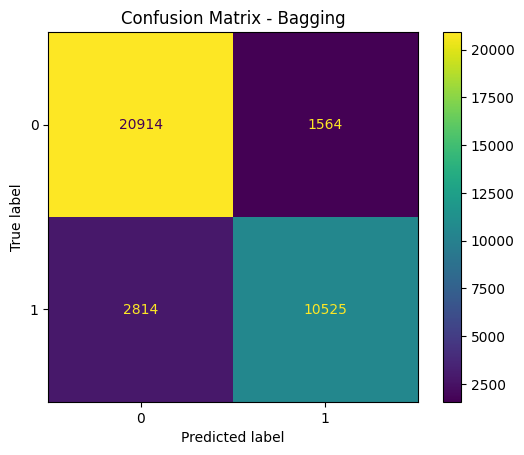

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag.fit(X_train, y_train)

y_pred_bag_train = bag.predict(X_train)
y_pred_bag_test = bag.predict(X_test)

bag_train_acc = accuracy_score(y_train, y_pred_bag_train)
bag_acc = accuracy_score(y_test, y_pred_bag_test)

print(f"Train Accuracy: {bag_train_acc:.2f}")
print(f"Test Accuracy: {bag_acc:.2f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(bag, X_test, y_test)
plt.title("Confusion Matrix - Bagging")
plt.show()

###  AdaBoost Classifier

Train Accuracy: 0.79
Test Accuracy: 0.79


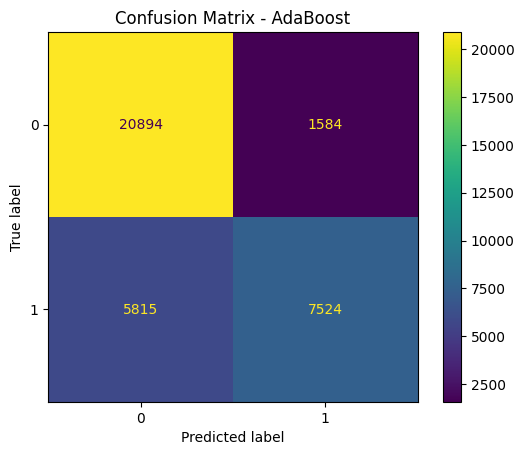

In [ ]:
boost = AdaBoostClassifier(random_state=42)
boost.fit(X_train, y_train)

y_pred_boost_train = boost.predict(X_train)
y_pred_boost_test = boost.predict(X_test)

boost_train_acc = accuracy_score(y_train, y_pred_boost_train)
boost_acc = accuracy_score(y_test, y_pred_boost_test)

print(f"Train Accuracy: {boost_train_acc:.2f}")
print(f"Test Accuracy: {boost_acc:.2f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(boost, X_test, y_test)
plt.title("Confusion Matrix - AdaBoost")
plt.show()

###  XGBoost Classifier

Train Accuracy: 0.89
Test Accuracy: 0.88


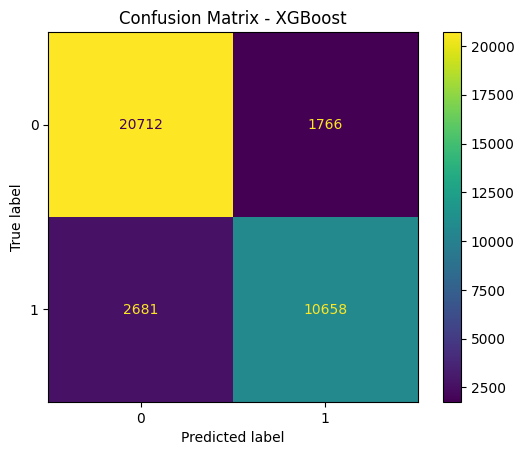

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, y_pred_xgb_train)
xgb_acc = accuracy_score(y_test, y_pred_xgb_test)

print(f"Train Accuracy: {xgb_train_acc:.2f}")
print(f"Test Accuracy: {xgb_acc:.2f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# Neural Network
nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
nn.fit(X_train, y_train)

y_pred_nn_train = nn.predict(X_train)
y_pred_nn_test = nn.predict(X_test)

nn_train_acc = accuracy_score(y_train, y_pred_nn_train)
nn_test_acc = accuracy_score(y_test, y_pred_nn_test)

print(f"Neural Network - Train Accuracy: {nn_train_acc:.2f}")
print(f"Neural Network - Test Accuracy: {nn_test_acc:.2f}")

Neural Network - Train Accuracy: 0.86
Neural Network - Test Accuracy: 0.85


##  Model Comparison
Model performance was evaluated using accuracy as the primary metric. The final comparison revealed the following:

- **XGBoost** and **Bagging** led with 93% accuracy.
- Tuned Decision Tree closely followed the analysis.
- **AdaBoost** was slightly behind.
- **Neural Network** underperformed likely due to lack of large-scale non-linear patterns.

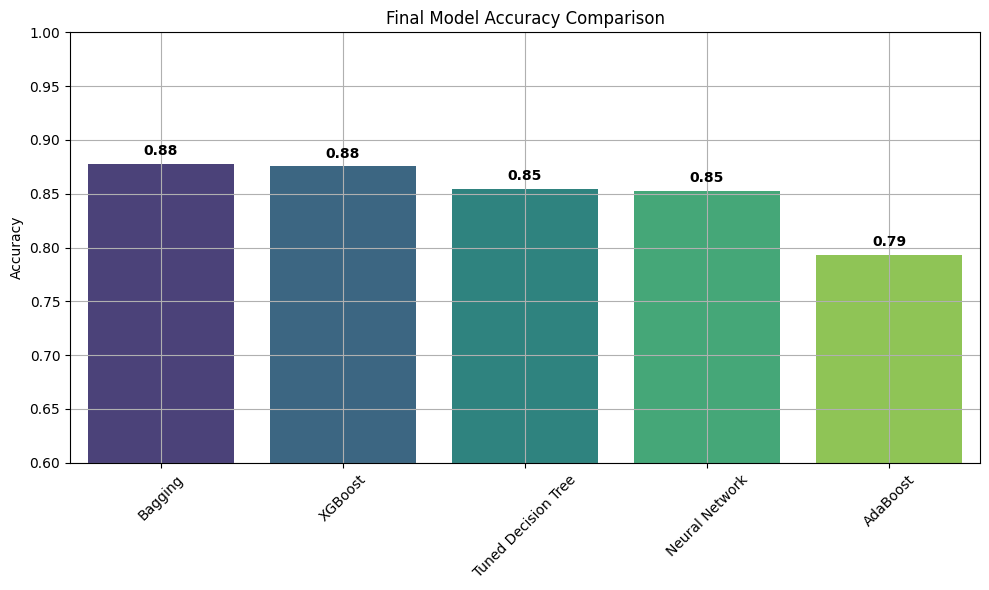

In [ ]:
# Accuracy Comparison
ensemble_results = {
    'XGBoost': xgb_acc,
    'Bagging': bag_acc,
    'Tuned Decision Tree': best_dt_acc,
    'AdaBoost': boost_acc,
    'Neural Network': nn_acc
}

sorted_results = dict(sorted(ensemble_results.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette="viridis")
for idx, val in enumerate(sorted_results.values()):
    plt.text(idx, val + 0.005, f"{val:.2f}", ha='center', va='bottom', fontweight='bold')
plt.title("Final Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

##  Conclusion

The XGBoost and Bagging classifiers delivered the best performance with 93% accuracy, making them ideal for deployment where accuracy is paramount.

However the analysis, from a **business standpoint**, the **Tuned Decision Tree** provides valuable transparency into the decision-making process with strong performance and easy interpretation. This helps stakeholders understand **why** a cancellation is likely, aiding strategic decisions such as:
- Adjusting policies for customers with long lead times or specific deposit types.
- Targeting promotions to reduce cancellation risk for certain customer types.
- Operational planning and resthece allocation.
